In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir("../wine-quality"))

['.git', '.ipynb_checkpoints', 'train.ipynb', 'winequality-red.csv']


IMPORTING DATA

In [3]:
data = pd.read_csv(".\winequality-red.csv")

In [4]:
data.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values. <br>
Then, let drop duplicates.

In [7]:
data = data.drop_duplicates()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [10]:
quality = data["quality"]
quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

As we can see, there is an imbalance problem in data. Most of them are 5 6 or 7.

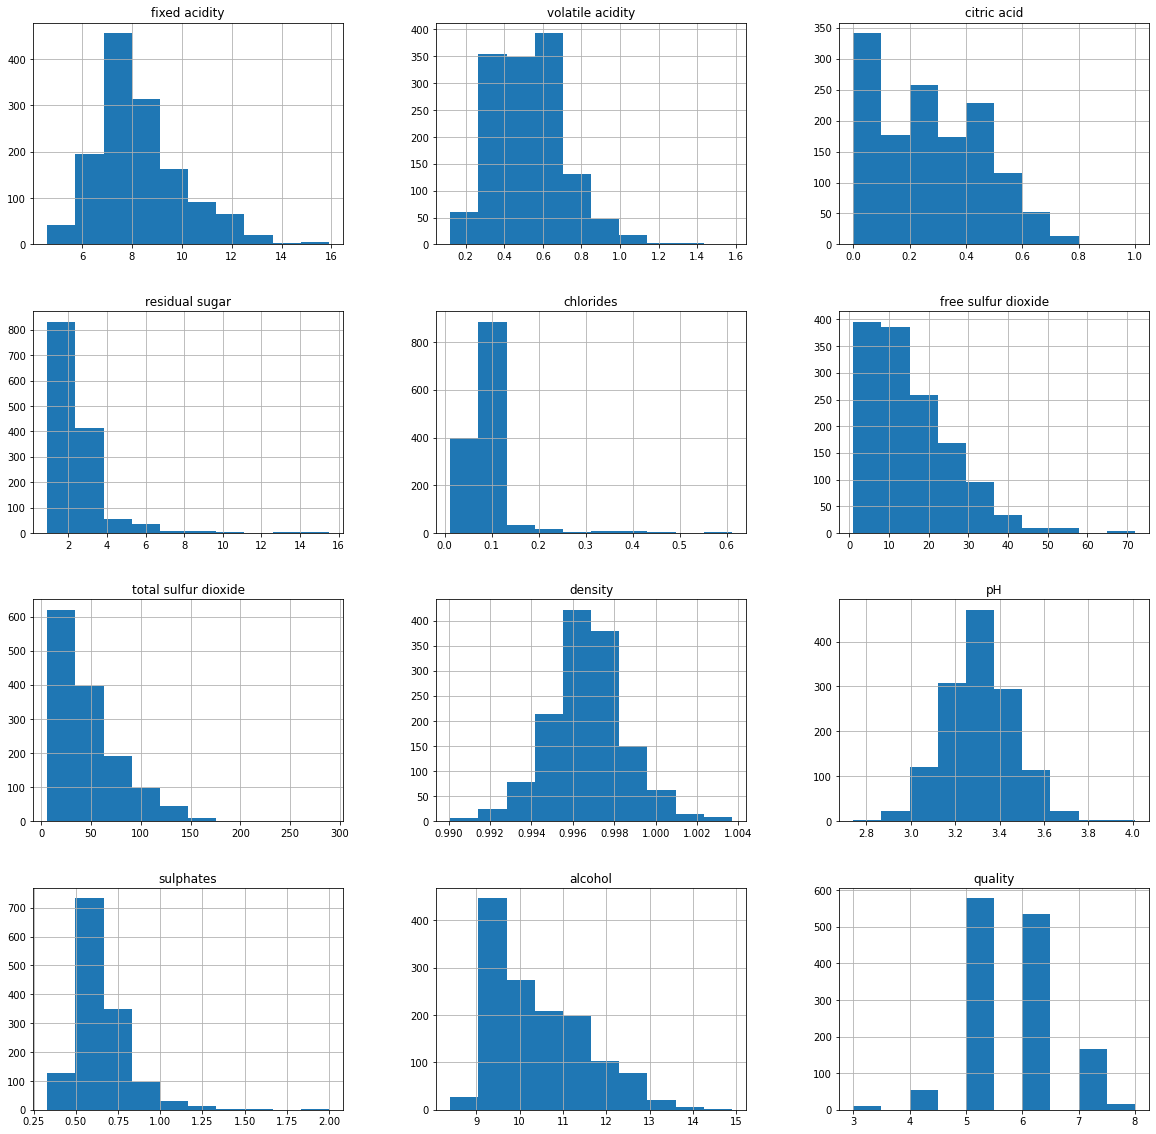

In [11]:
data.hist(figsize=(20,20))
plt.show()

Most features have a certain agglomeration value. Because of that, we have to use some scaler points and feature engineering.

In [12]:
data_corr = data.copy()
correlations = data_corr.corr()['quality'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 residual sugar    0.013640
fixed acidity     0.119024
citric acid       0.228057
sulphates         0.248835
alcohol           0.480343
quality           1.000000
Name: quality, dtype: float64

Most Negative Correlations: 
 volatile acidity       -0.395214
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
Name: quality, dtype: float64


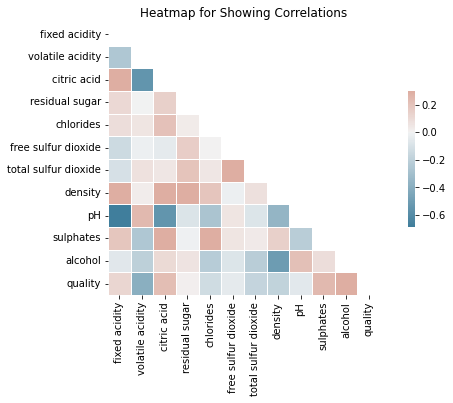

In [13]:
corr = data_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap for Showing Correlations');

Depend on heatmap we can see there are some strong relations between pH and fixed acidity, pH and citric acid, citric acid and volatile acidity,alcohol and density.

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


With that table, we can detect anomaly values of features. For example, a wine type cannot have a pH less than 1. But some of them maybe have wrong values.

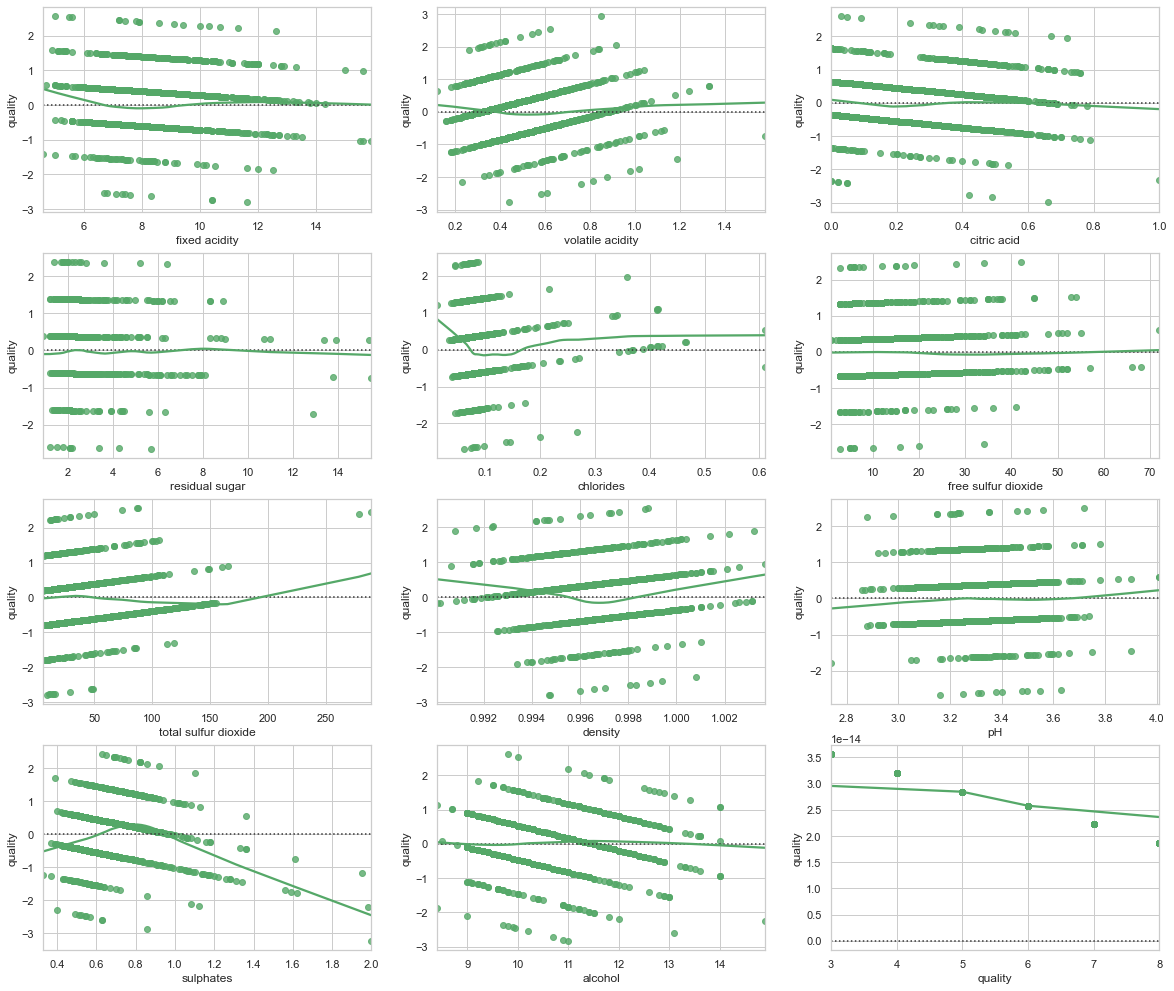

In [15]:
fig = plt.figure(figsize = (20, 40))
sns.set_theme(style="whitegrid")
for i in range(len(data.columns.tolist())):
    fig.add_subplot(9,3,i+1)
    sns.residplot(x=data.iloc[:,i], y=data["quality"], lowess=True, color="g")
    #plt.plot(data.iloc[:,i], data["quality"],linewidth=1.5, color='black')
plt.show()

Boxplot shows us the distribution and it's percentil stacking, the amount of outliers (values out of our scope or so to say, maths).

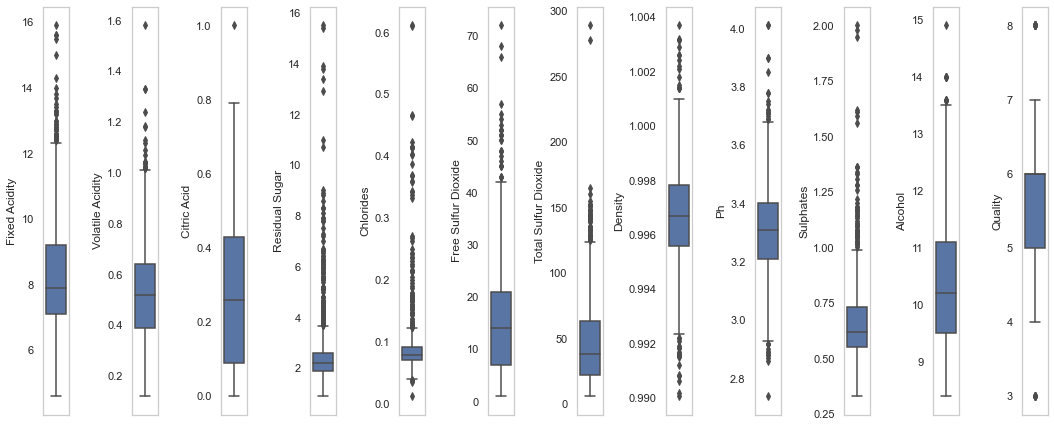

In [16]:
columns = [ col for col in data.columns if col not in [] ]
n_columns = len(data.columns)
fig, axes = plt.subplots(1, n_columns, figsize=(1.5 * n_columns, 7.5))
plt.subplots_adjust(wspace=2.5)
for index, col in enumerate(columns):
  ax = axes[int(index % n_columns)]
  ax.grid()
  sns.boxplot(data=data, y=col, ax=ax)
  ax.set_ylabel(col.title())

Text(0.5, 1.0, 'Quality Pie')

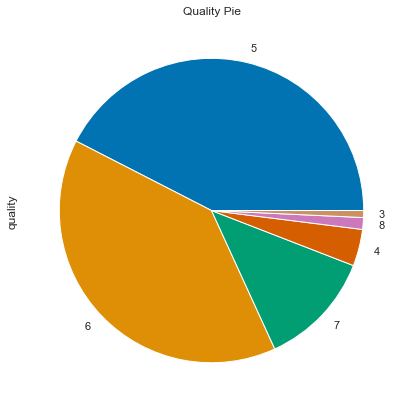

In [25]:
#plt.figure(figsize=(7, 7))
fig, ax = plt.subplots(figsize=(7, 7))
_ = data['quality'].value_counts().plot.pie(
  colors=sns.color_palette('colorblind')
)
ax.set_title("Quality Pie")

In this part, we also can see the distribution of quality, too.